In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
import sys
sys.path.append('/home/tomek/ib_tools')
from blotter import MongoBlotter
%matplotlib inline

In [2]:
cash = 109394
df = MongoBlotter().read()
df.tail(30)

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
762,5fa2c4c0a97b70197970f355,2020-11-04 16:12:00.649,2020-11-04 15:12:00.644,NQZ0,BUY,1.0,11711.000000,[0000e1a7.5fa2ab50.01.01],97,1407042953,ENTRY,2.10,0.000000
763,5fa2c4cfa97b70197970f356,2020-11-04 16:12:15.048,2020-11-04 15:12:14.954,MNQZ0,BUY,5.0,11720.800000,"[0000e1a7.5fa2ab51.01.01, 0000e1a7.5fa2ab55.01...",98,1407042956,ENTRY,2.35,0.000000
764,5fa2caeca97b70197970f367,2020-11-04 16:38:20.918,2020-11-04 15:38:20.881,NQZ0,SELL,1.0,11719.000000,[0000e1a7.5fa2b96d.01.01],99,1407042957,STOP-LOSS,2.10,155.800000
765,5fa2caeca97b70197970f368,2020-11-04 16:38:20.919,2020-11-04 15:38:20.917,MNQZ0,SELL,5.0,11719.000000,[0000e1a7.5fa2b972.01.01],100,1407042958,STOP-LOSS,2.35,-22.700000
766,5fa2dd04a97b70197970f3a9,2020-11-04 17:55:32.064,2020-11-04 16:55:31.971,NQZ0,BUY,1.0,11802.000000,[0000e1a7.5fa2d408.01.01],101,1407042961,ENTRY,2.10,0.000000
767,5fa2dd12a97b70197970f3aa,2020-11-04 17:55:46.256,2020-11-04 16:55:46.164,MNQZ0,BUY,7.0,11799.750000,"[0000e1a7.5fa2d402.01.01, 0000e1a7.5fa2d40a.01...",102,1407042964,ENTRY,3.29,0.000000
768,5fa2edf7a97b70197970f3e3,2020-11-04 19:07:51.586,2020-11-04 18:07:51.543,MNQZ0,SELL,7.0,11763.857143,"[0000e1a7.5fa2e560.01.01, 0000e1a7.5fa2e561.01...",104,1407042966,STOP-LOSS,3.29,-509.080000
769,5fa2edf9a97b70197970f3e4,2020-11-04 19:07:53.475,2020-11-04 18:07:53.472,NQZ0,SELL,1.0,11772.000000,[0000e1a7.5fa2e568.01.01],103,1407042965,STOP-LOSS,2.10,-604.200000
770,5fa30fdba97b70197970f45d,2020-11-04 21:32:27.353,2020-11-04 20:32:27.350,YM DEC 20,SELL,1.0,27777.000000,[0000e1a7.5fa30d87.01.01],94,1407042945,STOP-LOSS,2.10,965.800000
771,5fa30fdba97b70197970f45e,2020-11-04 21:32:27.641,2020-11-04 20:32:27.638,MYM DEC 20,SELL,1.0,27774.000000,[0000e1a7.5fa30d89.01.01],93,1407042944,STOP-LOSS,0.47,93.560000


In [3]:
df.head()

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
0,5f0f0525bd2ee6b18fd4eeb2,2020-07-15 15:31:17.017,2020-07-15 13:31:17.007,MYM SEP 20,SELL,6.0,26855.00,[0000e1a7.5f0f086b.01.01],1248,779987153,STOP-LOSS,2.82,1416.36
1,5f0f0525bd2ee6b18fd4eeb3,2020-07-15 15:31:17.560,2020-07-15 13:31:17.559,YM SEP 20,SELL,1.0,26855.00,[0000e1a7.5f0f086d.01.01],1247,779987152,STOP-LOSS,2.10,2370.80
2,5f0f1613f81f3181af388633,2020-07-15 16:43:31.133,2020-07-15 14:43:31.088,NQU0,BUY,1.0,10749.00,[0000e1a7.5f0f3a1f.01.01],1265,165612016,ENTRY,2.10,0.00
3,5f0f1613f81f3181af388634,2020-07-15 16:43:31.139,2020-07-15 14:43:31.133,MNQU0,BUY,1.0,10748.75,[0000e1a7.5f0f3a20.01.01],1266,165612017,ENTRY,0.47,0.00
4,5f0f1923f81f3181af38863d,2020-07-15 16:56:35.084,2020-07-15 14:56:35.083,MNQU0,SELL,1.0,10717.50,[0000e1a7.5f0f3fa0.01.01],1268,165612019,STOP-LOSS,0.47,-63.44


In [4]:
df[df.reason.str.startswith('MANUAL')]

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
372,5f48024d0b06e6e56accaabb,2020-08-27 20:58:21.765,2020-08-27 18:58:21.760,NQU0,SELL,1.0,11961.75,[0000e1a7.5f47e774.01.01],-3,2141716104,MANUAL TRADE,2.1,0.0
373,5f48027e0b06e6e56accaabc,2020-08-27 20:59:10.623,2020-08-27 18:59:10.619,NQU0,BUY,1.0,11961.00,[0000e1a7.5f47e791.01.01],-4,2141716114,MANUAL TRADE,2.1,10.8
404,5f525a98f2a5ab6f74f19b3e,2020-09-04 17:17:44.300,2020-09-04 15:17:44.298,NQU0,SELL,1.0,11320.75,[0000e1a7.5f526f0b.01.01],-4,1940011984,MANUAL TRADE,2.1,0.0
432,5f7d98e9140b04161c23105c,2020-10-07 12:31:05.067,2020-10-07 10:31:05.065,NQZ0,SELL,1.0,11319.00,[0000e1a7.5f7d1bd9.01.01],-4,533904426,MANUAL TRADE,2.1,-169.2


In [5]:
df = df[df['sys_time'] > '20201008']

In [6]:
df.count()

_id            353
sys_time       353
time           353
contract       353
action         353
amount         353
price          353
exec_ids       353
order_id       353
perm_id        353
reason         353
commission     353
realizedPNL    353
dtype: int64

In [7]:
df[df.realizedPNL>0].realizedPNL.count()

66

In [8]:
#del df['sys_time']
del df['exec_ids']
del df['perm_id']
del df['_id']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])
micro_contracts = df[df.contract.str.startswith('M')]
macro_contracts = df[~df.contract.str.startswith('M')]
micro_contracts['amount'] /= 10
df = pd.concat([macro_contracts, micro_contracts]).sort_index()
df.contract = df.contract.str.strip('M')
df['contract'] = df['contract'].apply(lambda x: x[:2])
df.contract = df.contract.str.strip()

In [9]:
df.tail()

,sys_time,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,,
2020-11-05 14:57:50.057,2020-11-05 15:57:50.195,YM,BUY,0.5,28229.20,102,ENTRY,2.35,0.0,134037.74001
2020-11-05 19:45:04.099,2020-11-05 20:45:04.234,NQ,BUY,2.0,12109.25,105,ENTRY,4.20,0.0,134037.74001
2020-11-05 19:45:10.304,2020-11-05 20:45:10.438,NQ,BUY,0.5,12108.75,106,ENTRY,2.35,0.0,134037.74001
2020-11-05 20:17:09.669,2020-11-05 21:17:09.671,NQ,SELL,2.0,12058.50,107,STOP-LOSS,4.20,-2038.4,131999.34001
2020-11-05 20:17:17.826,2020-11-05 21:17:17.827,NQ,SELL,0.5,12061.50,108,STOP-LOSS,2.35,-477.2,131522.14001


In [10]:
c = set(df['contract'])
allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
#allocs = pd.Series([1/3, 2/3, 1], index=['ES','NQ', 'total'])
allocs = pd.Series([.4, .125, .225, .25, 1], index=['NQ','ES', 'GC', 'YM', 'total'])

In [11]:
allocs

NQ       0.400
ES       0.125
GC       0.225
YM       0.250
total    1.000
dtype: float64

In [12]:
df.groupby('contract').realizedPNL.sum()

contract
ES     4538.120000
GC     1540.840001
NQ    12080.300010
YM     3968.879999
Name: realizedPNL, dtype: float64

In [13]:
df.realizedPNL.sum()

22128.140010000003

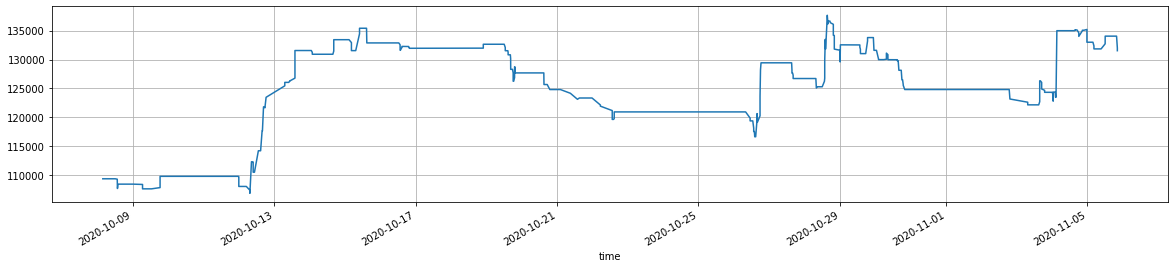

In [14]:
df.cash.plot(figsize=(20,4), grid=True);

In [15]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [16]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES     23
 GC     34
 NQ    242
 YM     54
 Name: action, dtype: int64,
 353)

In [17]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES     1.095238
 GC     1.619048
 NQ    11.523810
 YM     2.571429
 Name: action, dtype: float64,
 16.80952380952381)

In [18]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES     71.66
GC    104.40
NQ    821.42
YM    149.96
Name: commission, dtype: float64

In [19]:
df.commission.sum()

1147.44

In [20]:
# per trade stats (pro rated per macro contract)
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss', 
                                'win_ratio', 'EV/contract', 'number_of_contracts'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    d['pnl_per_contract'] = d.realizedPNL / d.amount
    row['average_PNL'] = round(d['pnl_per_contract'].mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0])['pnl_per_contract'].mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0])['pnl_per_contract'].mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV/contract'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_contracts'] = d.amount.sum()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV/contract,number_of_contracts
NQ,0.37,21.19,1055.23,-585.45,1.80,21.60,157.0
YM,0.44,136.36,1046.81,-592.00,1.77,129.08,28.8
GC,0.31,59.92,1255.23,-483.40,2.60,55.58,15.4
ES,0.42,679.44,3053.83,-1016.54,3.00,693.02,8.2
total,0.38,88.02,1220.26,-603.90,2.02,89.28,209.4


In [21]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [22]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,GC,NQ,YM,total
ES,1.000000,-0.010991,0.150811,0.351120,0.485357
GC,-0.010991,1.000000,-0.138460,0.271412,0.195776
NQ,0.150811,-0.138460,1.000000,0.029103,0.840241
YM,0.351120,0.271412,0.029103,1.000000,0.463094
total,0.485357,0.195776,0.840241,0.463094,1.000000


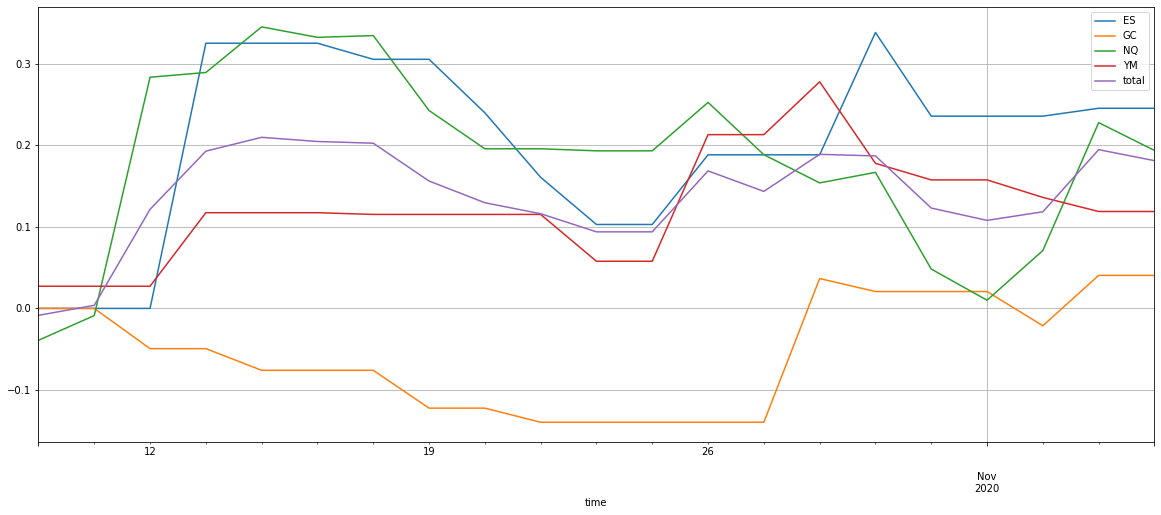

In [23]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

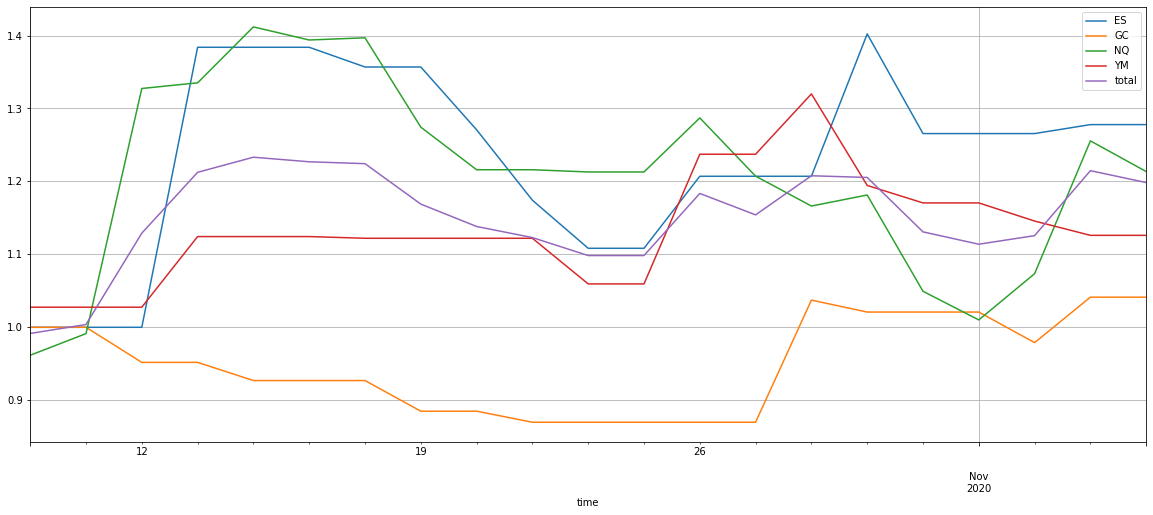

In [24]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [25]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,GC,NQ,YM,total
Annual return,17.963520,0.625084,9.200800,3.156455,7.777654
Cumulative returns,0.277889,0.041293,0.213537,0.126057,0.198436
Annual volatility,1.584086,0.779362,1.521369,0.829207,0.731135
Sharpe ratio,2.514056,0.963881,2.177564,2.100161,3.319977
Calmar ratio,90.194942,4.801496,32.330824,21.482758,71.129275
Stability,0.108936,0.113282,0.034351,0.322856,0.097265
Max drawdown,-0.199163,-0.130185,-0.284583,-0.146930,-0.109345
Omega ratio,2.061832,1.323418,1.592706,1.686629,1.844589
Sortino ratio,7.609423,2.541418,5.393595,4.358998,7.665735
Skew,2.588197,2.883698,2.018511,1.325897,0.938291


In [26]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,GC,NQ,YM,total
time,,,,,
2020-10-31,26.56,2.09,4.94,17.05,13.08
2020-11-30,0.97,2.00,15.64,-3.80,5.98


In [27]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES       28.0
GC        4.0
NQ       21.0
YM       13.0
total    20.0
dtype: float64

In [28]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2020-11-04 03:14:38.840,NQ,SELL,11651.500000,11506.60
2020-10-12 08:41:25.532,NQ,SELL,11849.250000,5112.40
2020-10-13 14:11:33.923,ES,SELL,3508.250000,4770.80
2020-10-26 18:07:23.135,YM,BUY,27466.000000,4371.60
2020-10-28 15:23:18.827,GC,BUY,1877.000000,4310.32
...,...,...,...,...
2020-10-29 23:07:31.042,NQ,BUY,11232.000000,-2003.40
2020-10-29 00:09:52.931,YM,BUY,26615.000000,-2028.40
2020-11-05 20:17:09.669,NQ,SELL,12058.500000,-2038.40


In [29]:
daily.sort_values('total', ascending=False)

,ES,GC,NQ,YM,total
time,,,,,
2020-10-12,0.000000,-0.048118,0.339078,0.000000,0.124805
2020-11-04,0.009712,0.063649,0.169632,-0.017112,0.079110
2020-10-26,0.089103,0.000000,0.061112,0.167803,0.077534
2020-10-13,0.383923,0.000000,0.005817,0.094245,0.073878
2020-10-28,0.000000,0.192513,-0.033958,0.066886,0.046454
2020-10-14,0.000000,-0.026177,0.057465,0.000000,0.017096
2020-10-09,0.000000,0.000000,0.030839,0.000000,0.012336
2020-11-03,0.000000,-0.041049,0.062782,-0.021236,0.010568
2020-10-23,0.000000,0.000000,0.000000,0.000000,0.000000
